<IPython.core.display.Javascript object>


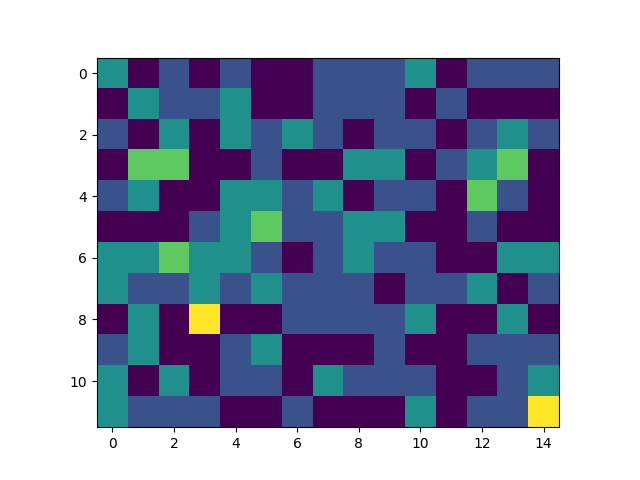

Textarea(value='', description='event:', placeholder='')

IntSlider(value=1, min=1)

Output(layout=Layout(border='1px solid black'))

In [26]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as wdg  # Using the ipython notebook widgets

sizex=12
# Create a random image
a = np.random.poisson(size=(sizex,15))
fig = plt.figure()
plt.imshow(a)

def plotear():
    a = np.random.poisson(size=(sizex,sizex))
    plt.imshow(a)

# Create and display textarea widget
txt = wdg.Textarea(
    value='',
    placeholder='',
    description='event:',
    disabled=False
)

def on_value_change_slider(change):
    global sizex
    sizex=change['new']
    plotear()
    with output2:
        output2.clear_output()
        print(change['new'])
sizex_widget=wdg.IntSlider(min=1)
output2 = wdg.Output(layout={'border': '1px solid black'})
sizex_widget.observe(on_value_change_slider, names='value')

display(txt,sizex_widget,output2)
lista=[]

# Define a callback function that will update the textarea
def onclick(event):
    global sizex
    sizex=int(event.xdata)
    txt.value = str(event.xdata)+" "+str(sizex)  # Dynamically update the text box 
    plotear()


# Create an hard reference to the callback not to be cleared by the garbage collector
ka = fig.canvas.mpl_connect('button_press_event', onclick)

<IPython.core.display.Javascript object>


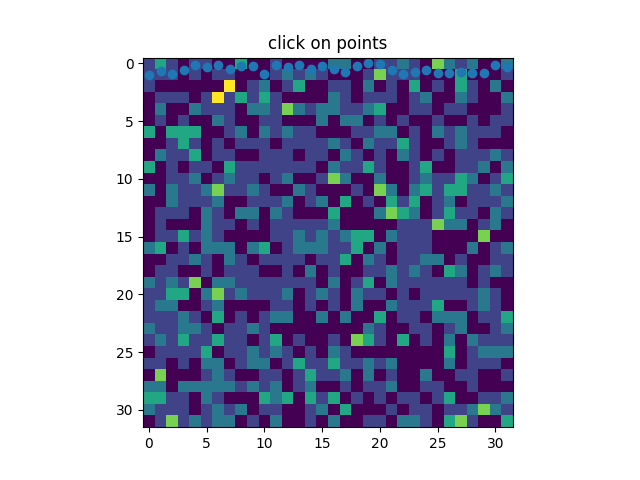

Output(layout=Layout(border='1px solid black'))

In [27]:
#Ojo, averiguar que onda con multiples gráficos! Se mezclan por el plt.show()
#%matplotlib notebook #ya esta todo declarado arriba
#import numpy as np
#import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_title('click on points')

line, = ax.plot(np.random.rand(100), 'o',
                picker=True, pickradius=5)  # 5 points tolerance

def onpick(event):
    thisline = event.artist
    xdata = thisline.get_xdata()
    ydata = thisline.get_ydata()
    ind = event.ind
    points = tuple(zip(xdata[ind], ydata[ind]))
    with out:
        out.clear_output()
        print('onpick points:', points)

ka = fig.canvas.mpl_connect('pick_event', onpick)

plt.show()

out = wdg.Output(layout={'border': '1px solid black'})
out